In [316]:
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import pickle
from bs4 import BeautifulSoup


In [317]:
import pandas as pd,numpy as np

In [318]:
df = pd.read_csv("train.csv")

In [319]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [320]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [321]:
df.dropna(inplace=True)

In [322]:
df.duplicated().sum()

0

<Axes: xlabel='is_duplicate'>

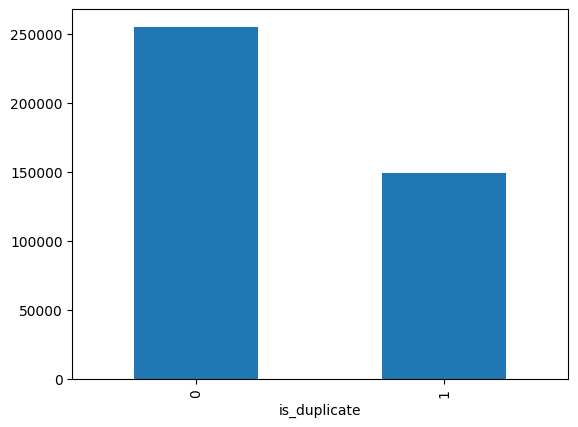

In [323]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [324]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
display("Number of Unique question" ,np.unique(qid).shape[0])
x = qid.value_counts()>1
display("Number of Repeated question" ,x[x].shape[0])

'Number of Unique question'

537929

'Number of Repeated question'

111778

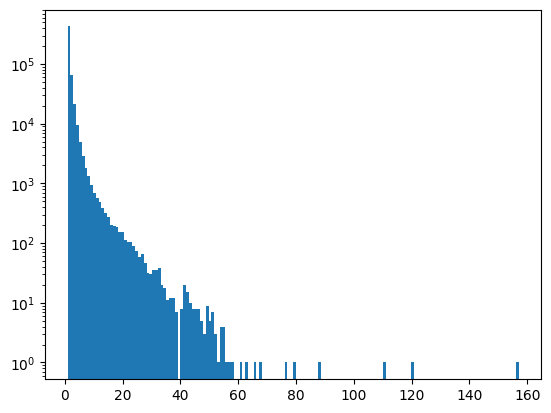

In [325]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

* 1 question has been asked more than 150 times

question1 = bow
question2 = bow
y = is_duplicate  
using this technique

### feature engineering

* 1. q1_len , q2_len
* 2. q1_words, q2_words
* 3. words_common , words_total (q1_words + q2_words)
* 4. word_share (words_common/total_words)

* 3000 BOW of q1 & 3000 BOW of q2
* now dataset has 6013 columns

In [326]:
new_df = df.sample(n=100,random_state=2)

In [327]:
new_df["q1_len"] = new_df.question1.str.len()
new_df["q2_len"] = new_df.question2.str.len()

In [328]:
new_df["q1_words"] = new_df.question1.apply(lambda row : len(row.split(" ")))
new_df["q2_words"] = new_df.question2.apply(lambda row : len(row.split(" ")))

In [329]:
def common_words(row):
    q1 = set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    q2 = set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))    
    return len(q1 & q2)  # return intersection of 2 sets

In [330]:
new_df['common_words'] = new_df.apply(common_words,axis=1)

In [331]:
def total_words(row):
    q1 = set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    q2 = set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))    
    return (len(q1)+len(q2))  # return intersection of 2 sets

In [332]:
new_df['total_words'] = new_df.apply(total_words,axis=1)

In [333]:
new_df['words_share'] = round(new_df['common_words']/new_df['total_words'],2)

In [334]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,words_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


#### Analysis of feature

Minimum character 14
Max character 147
Average character 64


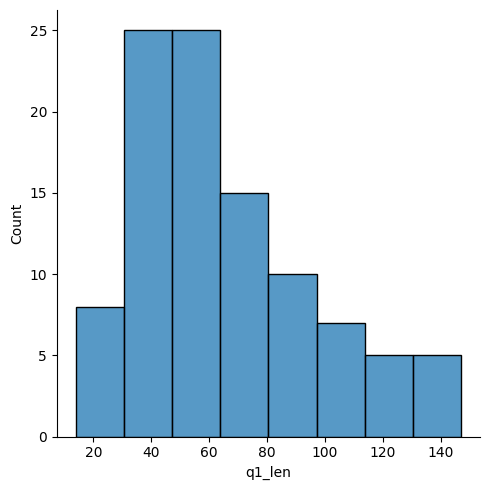

In [335]:
sns.displot(new_df['q1_len'])
print("Minimum character" , new_df['q1_len'].min())
print("Max character" , new_df['q1_len'].max())
print("Average character" , int(new_df['q1_len'].mean()))

Minimum character 15
Max character 192
Average character 65


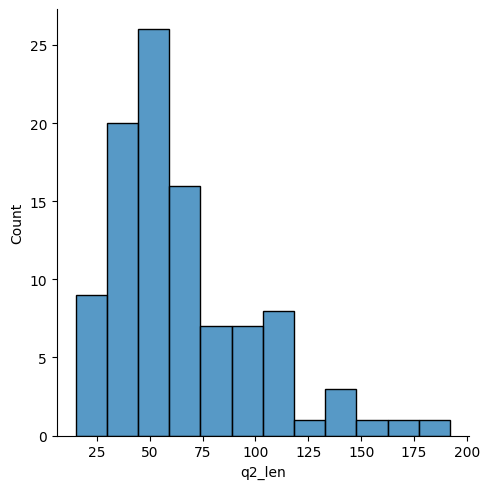

In [336]:
sns.displot(new_df['q2_len'])
print("Minimum character" , new_df['q2_len'].min())
print("Max character" , new_df['q2_len'].max())
print("Average character" , int(new_df['q2_len'].mean()))

Minimum words 3
Max word 29
Average word 11


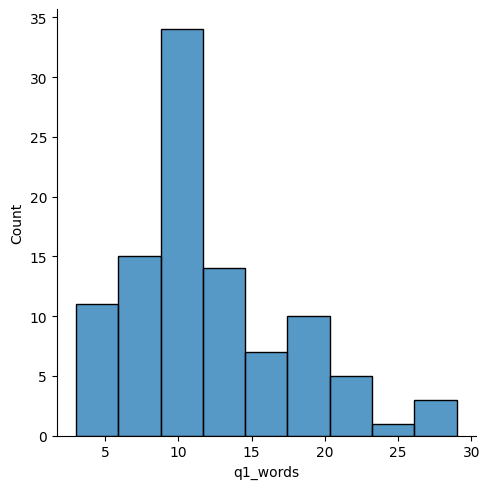

In [337]:
sns.displot(new_df['q1_words'])
print("Minimum words" , new_df['q1_words'].min())
print("Max word" , new_df['q1_words'].max())
print("Average word" , int(new_df['q1_words'].mean()))

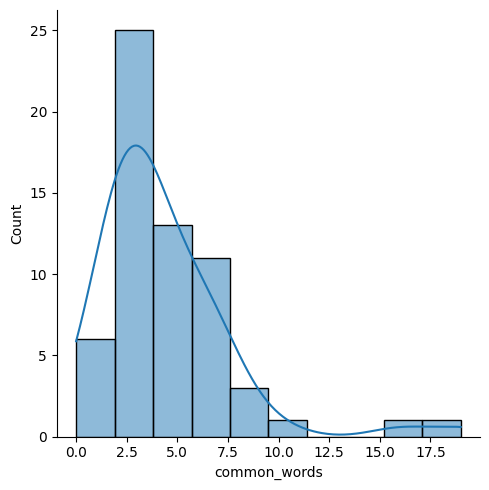

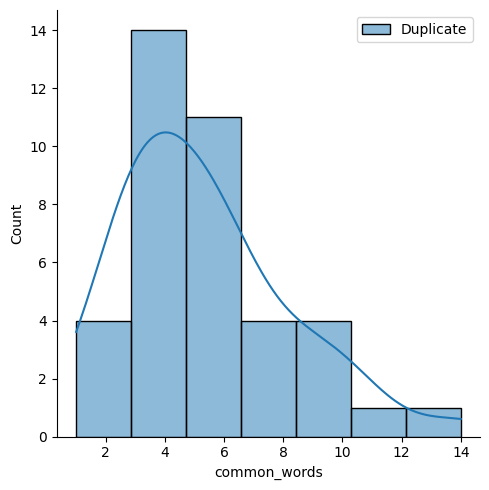

In [338]:
# common words
sns.displot(new_df[new_df['is_duplicate']==0]['common_words'],label="No Duplicate",kde=True)
sns.displot(new_df[new_df['is_duplicate']==1]['common_words'],label="Duplicate",kde=True)
plt.legend()
plt.show()

* if common words > 4 high chances question is duplicated

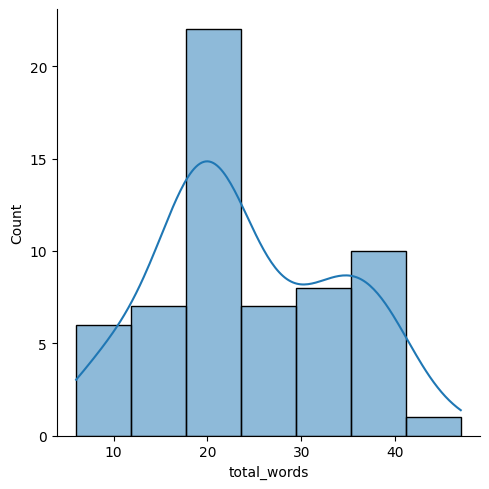

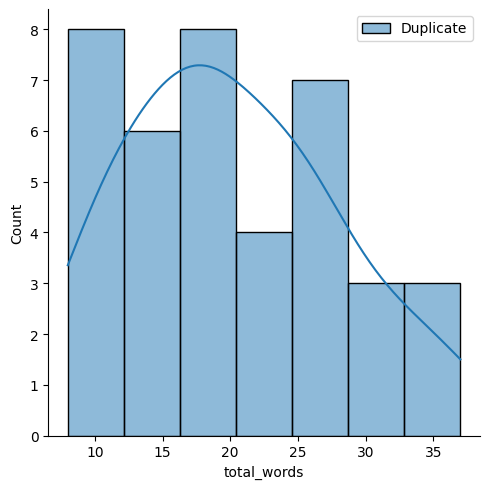

In [339]:
# total words
sns.displot(new_df[new_df['is_duplicate']==0]['total_words'],label="No Duplicate",kde=True)
sns.displot(new_df[new_df['is_duplicate']==1]['total_words'],label="Duplicate",kde=True)
plt.legend()
plt.show()

* if total words < 20 high chances question is duplicate

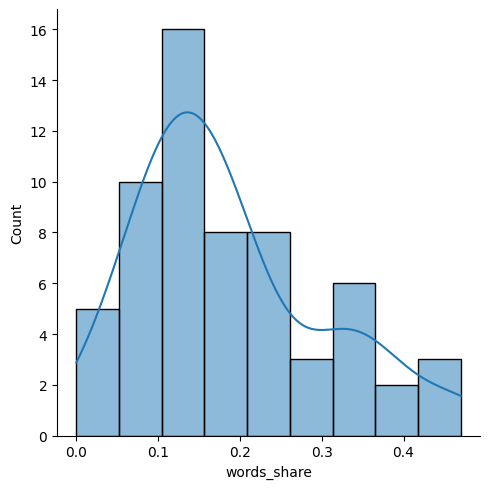

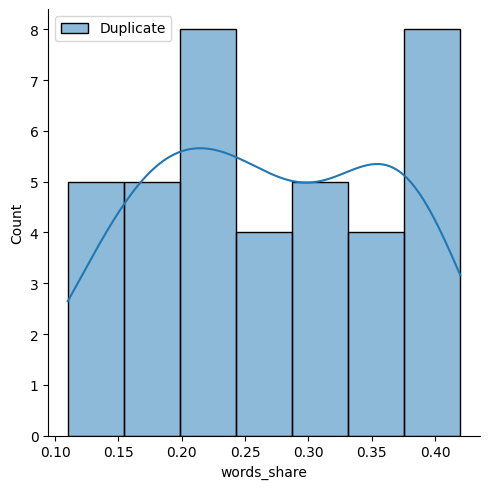

In [340]:
#  words share
sns.displot(new_df[new_df['is_duplicate']==0]['words_share'],label="No Duplicate",kde=True)
sns.displot(new_df[new_df['is_duplicate']==1]['words_share'],label="Duplicate",kde=True)
plt.legend()
plt.show()

In [341]:
question_df = new_df[['question1' , 'question2']]
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'],axis=1)


In [342]:
from sklearn.feature_extraction.text import CountVectorizer

# merge question
questions = list(question_df['question1']) + list(question_df['question2'])

cv = CountVectorizer(max_features=200)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [343]:
temp_df1 = pd.DataFrame(q1_arr,index = question_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = question_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(100, 400)

In [344]:
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(100, 408)

In [345]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,words_share,0,1,...,190,191,192,193,194,195,196,197,198,199
331535,1,26,44,5,8,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,10,16,5,25,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,8,23,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[: , 1:].values,
                                                final_df.iloc[: , 0].values,
                                                test_size=0.2,random_state=42)

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

75.0

In [348]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
model = BaggingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

70.0

#### Advance Feature

In [349]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [350]:
preprocess("I'm going home wann do dance with me?")

'i am going home wann do dance with me'

In [351]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_21192\616889073.py:161: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [352]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,words_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


#### 1. Token Features
1. cwc_min: This is the ratio of the number of common words to the length of the smaller question
2. cwc_max: This is the ratio of the number of common words to the length of the larger question
3. csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
4. csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
5. ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
6. ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
7. last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
8. first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

#### 2. Length Based Features
1. mean_len: Mean of the length of the two questions (number of words)
2. abs_len_diff: Absolute difference between the length of the two questions (number of words)
3. longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
#### 3. Fuzzy Features
1. fuzz_ratio: fuzz_ratio score from fuzzywuzzy
2. fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
3. token_sort_ratio: token_sort_ratio from fuzzywuzzy
4. token_set_ratio: token_set_ratio from fuzzywuzzy

### 1. Token Features

In [353]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)  #why safe_div?.. bcz to avoid division by 0
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [354]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [355]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,total_words,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,13,0.15,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1,0
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,12,0.33,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1,0
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,9,0.22,0.000000,0.000000,0.999950,0.499988,0.666644,0.333328,0,1
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,...,25,0.20,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0,0
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,23,0.35,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1,0


### 2.Length Based Features

In [356]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))  # length of longest common substring
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [357]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [358]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,0.499988,0.000000,0.000000,0.399992,0.249997,1,0,3,6.5,0.615385
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,0.666644,0.999950,0.499988,0.799984,0.571420,1,0,2,6.0,0.500000
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,0.000000,0.999950,0.499988,0.666644,0.333328,0,1,3,4.5,0.476190
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,...,0.571420,0.499988,0.222220,0.545450,0.374998,0,0,5,13.5,0.244444
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,0.799984,0.666656,0.499994,0.727266,0.666661,1,0,1,11.5,0.355932


### 3.Fuzzy Features

In [359]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [360]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

#### EDA

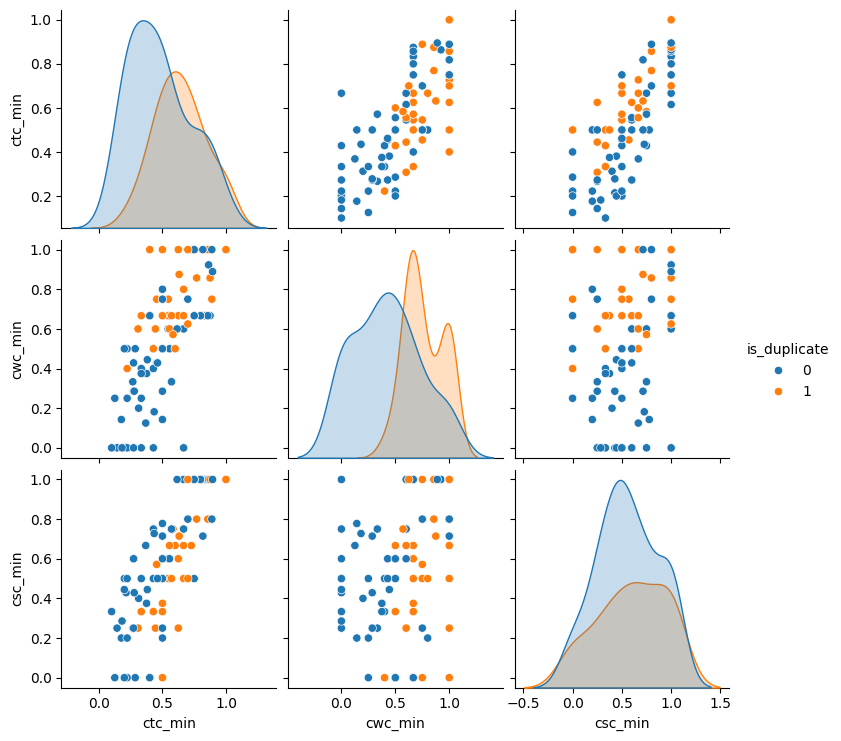

In [361]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue="is_duplicate")

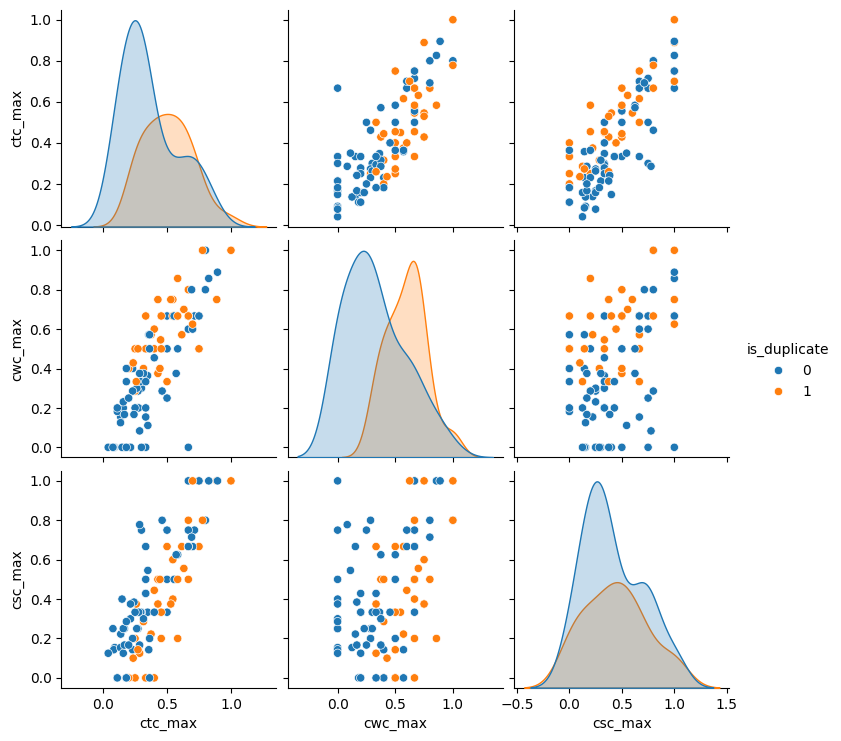

In [362]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue="is_duplicate")

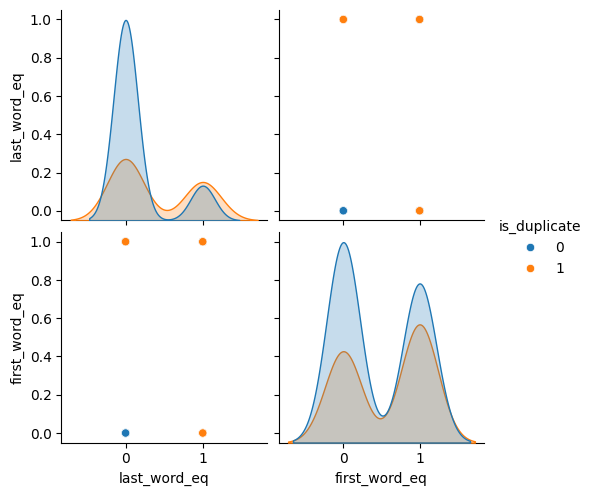

In [363]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue="is_duplicate")

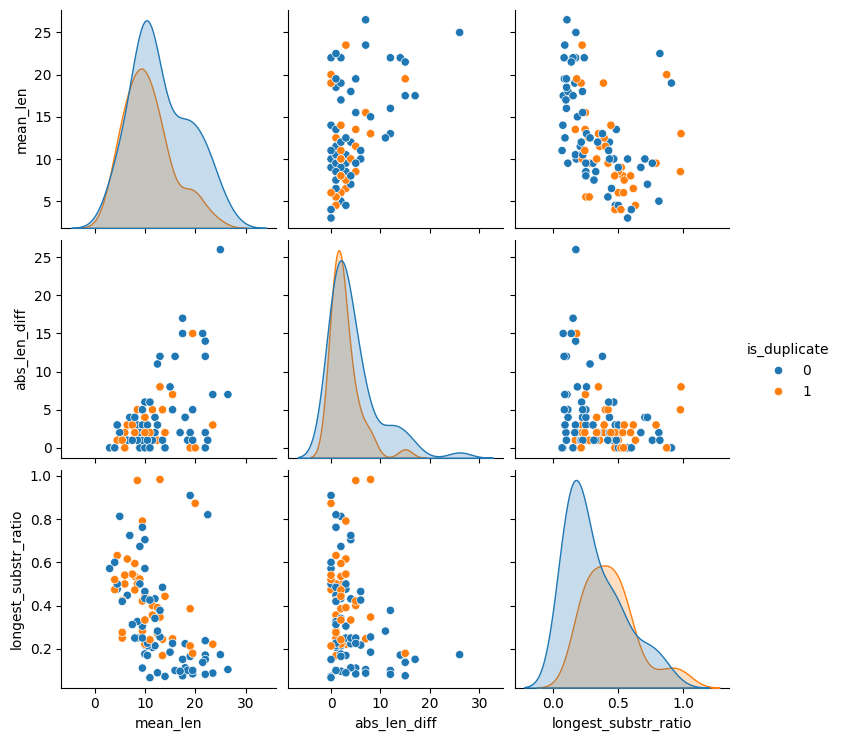

In [364]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue="is_duplicate")

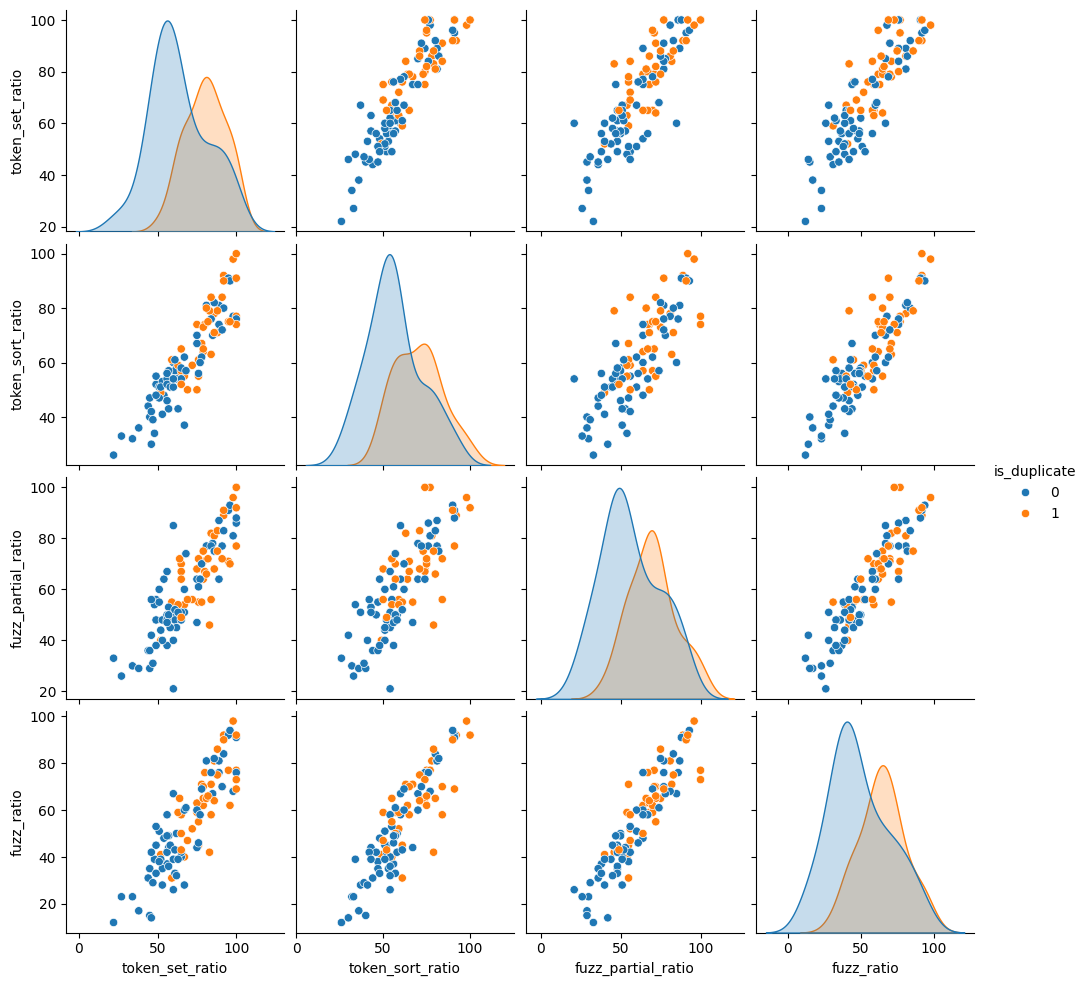

In [365]:
sns.pairplot(new_df[['token_set_ratio','token_sort_ratio','fuzz_partial_ratio','fuzz_ratio','is_duplicate']],hue="is_duplicate")

In [366]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [367]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 1.954s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.673131
[t-SNE] Computed conditional probabilities in 0.046s
[t-SNE] Iteration 50: error = 50.7059479, gradient norm = 0.4433736 (50 iterations in 0.050s)
[t-SNE] Iteration 100: error = 51.2264404, gradient norm = 0.5029953 (50 iterations in 0.041s)
[t-SNE] Iteration 150: error = 51.8355789, gradient norm = 0.4692502 (50 iterations in 0.027s)
[t-SNE] Iteration 200: error = 51.4111443, gradient norm = 0.5161515 (50 iterations in 0.027s)
[t-SNE] Iteration 250: error = 49.6872330, gradient norm = 0.5648945 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.687233
[t-SNE] Iteration 300: error = 0.1378310, gradient norm = 0.0041217 (50 iterations in 0.028s)
[t-SNE] Iteration 350: error = 0.1281930, gradient norm = 0.0010138 (

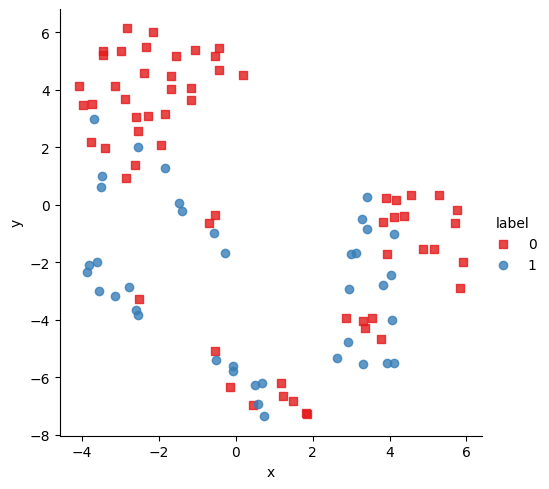

In [368]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [369]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.673131
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 65.2463531, gradient norm = 0.2062269 (50 iterations in 0.071s)
[t-SNE] Iteration 100: error = 67.8209305, gradient norm = 0.4367121 (50 iterations in 0.052s)
[t-SNE] Iteration 150: error = 78.7211151, gradient norm = 0.2605214 (50 iterations in 0.048s)
[t-SNE] Iteration 200: error = 83.9428253, gradient norm = 0.2920488 (50 iterations in 0.056s)
[t-SNE] Iteration 250: error = 84.5223160, gradient norm = 0.5422945 (50 iterations in 0.046s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.522316
[t-SNE] Iteration 300: error = 1.6152700, gradient norm = 0.0074536 (50 iterations in 0.041s)
[t-SNE] Iteration 350: error = 1.3060670, gradient norm = 0.0060978 (

In [370]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [371]:
# new_df.head()
data = new_df.iloc[: ,13: ]
# final_df
# new_df.columns
final_df = pd.concat([final_df , data],axis=1)

In [372]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,words_share,0,1,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,1,26,44,5,8,2,13,0.15,0,0,...,0.249997,1,0,3,6.5,0.615385,59,68,50,75
45407,1,34,44,5,7,4,12,0.33,0,0,...,0.571420,1,0,2,6.0,0.500000,71,82,63,84
286200,0,21,38,3,6,2,9,0.22,0,0,...,0.333328,0,1,3,4.5,0.476190,67,85,60,60
157195,1,45,73,10,16,5,25,0.20,0,0,...,0.374998,0,0,5,13.5,0.244444,45,55,61,76
154346,1,59,64,11,12,8,23,0.35,0,0,...,0.666661,1,0,1,11.5,0.355932,81,81,78,86


In [373]:
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[: , 1:].values,
                                                final_df.iloc[: , 0].values,
                                                test_size=0.2,random_state=42)

In [374]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

75.0

In [375]:
model = BaggingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

70.0

* We want model that have less type 1 error

In [378]:
temp1= final_df.iloc[: , 8:408]
temp2 = final_df.iloc[: , 0:8]
temp3 = final_df.iloc[: , 408:]
data = pd.concat([temp2,temp3],axis=1)
final_df1 = pd.concat([data,temp1],axis=1)

In [384]:
x_train,x_test,y_train,y_test = train_test_split(final_df1.iloc[: , 1:].values,
                                                final_df1.iloc[: , 0].values,
                                                test_size=0.2,random_state=42)

In [385]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)*100

80.0

In [376]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001

#     STOP_WORDS = pickle.load(open('stopwords.pkl','rb'))
    
    STOP_WORDS = []
    token_features = [0.0] * 8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

def query_point_creator(q1, q2):
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1, 22), q1_bow, q2_bow))

In [396]:
q1 = "What is capital of india?"
q2 = "what icecream?"

res = query_point_creator(q1,q2)
model.predict(res)

array([0], dtype=int64)

In [399]:
pickle.dump(model , open("model.pkl" , "wb"))
pickle.dump(cv , open("cv.pkl" , "wb"))